**Layout of the Notebook:**      
A brief about the notation used and a small deerivation of the basic formulae followed by the code:
1. Importing numpy, matplotlib.pyplot pandas, sklearn, etc.    
1. Coded out the neural network in the first block (Start reading from fit() for better understanding of how this code works)       
1. Written the helper function for plotting decision boundary of the model
1. Written the helper functions to create or load the data (One dataset has been loade while the other has been created)
1. Loading the data
1. Fitting logistic regression over the data to observe linear decision boundary
1. Fitting the neural network, testing the accuracy on testing data, plotting the decision boundary
1. Loading another set of data and doing step 5 and 6 on it

**Notation:**

$A[0] = X.T$      

$A[i]$ is the output of layer $i - 1$ and input to layer $i$ with dimension $(n[i], m)$ where $n[i]$ is the number of nodes or features in layer $i$ and $m$ is the number of training examples.

$W[i]$ and $B[i]$ map $A[i - 1]$ to $Z[i]$. $W[i]$ and $B[i]$ have dimensions $(n[i], n[i - 1])$ and $(n[i], 1)$ respectively. $Z[i]$ has dimensions of $A[i]$ 

$A[i] = activation\_function(Z[i])$

$J$ denotes the cost function.

$$J = \frac{-1}{m} (Y * logA[L] + (1 - Y) * log(1 - A[L]))$$

$*$ denotes Hadamard Product and $@$ denotes dot product

$$Z[curr] = W[curr] @ A[curr - 1] + B[curr]$$

$$A[curr] = activation\_fn[curr](Z[curr])$$

**Derivative of Cost function wrt Z:**

$$\frac {dJ}{dZ[curr]}$$

$$    = \frac {dJ}{dZ[curr + 1]} * \frac {dZ[curr + 1]}{dZ[curr]}$$

$$    = \frac {dJ}{dZ[curr + 1]} * \frac {dZ[curr + 1]}{dA[curr]} * \frac {dA[curr]}{dZ[curr]}$$

$$    = \frac {dJ}{dZ[curr + 1]} * W[curr + 1].T * \frac{d(activation\_fn(Z))}{dZ}$$

$$    = W[curr + 1].T * \frac {dJ}{dZ[curr + 1]} * \frac{d(activation\_fn(Z))}{dZ} $$

index of last layer = number of layers = $L$
$$\frac {dJ}{dZ[L]}$$ 

$$    = \frac {dJ}{dA[L]} * \frac {dA[L]}{dZ[L]}$$

$$    = \frac {d( - (Y * logA[L] + (1 - Y) * log(1 - A[L])))}{dA[L]} * \frac{d activation_fn[curr](Z)}{dZ} $$

$$    = (- \frac{Y}{A} + \frac{(1 - Y)}{(1 - A)}) * \frac{d(activation\_fn(Z))}{dZ}$$


$$    = \frac{A - Y}{A * (1 - A)} * \frac{d(activation\_fn(Z))}{dZ}$$

**Derivative of the cost function wrt the parameter W:**

$$\frac {dJ}{dW}$$ 

$$    = \frac {dJ}{dZ} @ \frac {dZ}{dW}$$

$$    = \frac {dJ}{dZ} @ A[curr - 1].T$$

**Derivative of the cost function wrt the parameter B:**

$$\frac {dJ}{dB}$$

$$    = \frac {dJ}{dZ} * \frac {dZ}{dB} $$

$$    = \frac {dJ}{dZ} * 1$$

$$    = \frac {dJ}{dZ} $$


**Gradient Descent on W and B follow the formula**

$$\theta = \theta - \alpha * \frac{dJ}{d\theta}$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.linear_model import LogisticRegression


%matplotlib inline

**Coding out the neural network and associated functions:**

In [2]:
# Returns sigmoid of a numpy array
def sigmoid(x):
    return 1/ (1 + np.exp(-x))

# Returns the derivative of sigmoid of the array wrt an array
def d_sigmoid(x):
    return sigmoid(x) * (1 - sigmoid(x))

# Returns tanh of a numpy array
def tanh(x):
    return (np.exp(x) - np.exp(-x))/(np.exp(x) + np.exp(-x))

# Returns the derivative of tanh of the array wrt an array
def d_tanh(x):
    return 1 - np.power(tanh(x), 2)

# Cost function J:
def J(A, Y):
#     print((Y @ np.log(A).T)[0][0], (np.log(1 - A).T)[0][0] , A.shape[1])
    return -1 * ((Y @ np.log(A).T)[0][0] + ((1 - Y) @ np.log(1 - A).T)[0][0] ) / A.shape[1]

# Initialise the parameters and variables of the neural network:
def init_layers(neural_network, X):
    np.random.seed(2) 
    A = {0: X}
    Z = {}
    m = X.shape[1]
    
    if neural_network['W'] == None:
        W = {}
    else:
        W = neural_network['W']
    
    if neural_network['B'] == None:
        B = {}
    else:
        B = neural_network['B']
    
    for curr in range(1, L + 1):
        if 'W' not in neural_network or neural_network['W'] == None:
            W[curr] = np.random.randn(n[curr], n[curr - 1]) * 0.1
        if 'B' not in neural_network or neural_network['B'] == None:
            B[curr] = np.random.randn(n[curr], 1) * 0.1
        Z[curr] = np.zeros((n[curr], m))
        A[curr] = np.zeros((n[curr], m))
    neural_network['W'] = W
    neural_network['B'] = B
    return A, Z
 
# Forward Propagation through all the layers of the neural network:
def forward_propagation(neural_network, A, Z):
    L = neural_network['L']
    activation_fn = neural_network['activation_fn']
    W = neural_network['W']
    B = neural_network['B']

    for curr in range(1, L + 1):
        Z[curr] = W[curr] @ A[curr - 1] + B[curr]
        A[curr] = activation_fn[curr](Z[curr])

        
# Backward Propagation through all the layers of the neural network:
def backward_propagation(neural_network, X, Y, A, Z):
    L = neural_network['L']
    activation_fn = neural_network['activation_fn']
    d_activation_fn = neural_network['d_activation_fn']
    W = neural_network['W']
    B = neural_network['B']
    n = neural_network['n']
    m = X.shape[1]
    
    for curr in range(L, 0, -1):
        if curr == L:
            dZ = ((A[L] - Y)/(A[L]*(1-A[L]))) * d_activation_fn[curr](Z[curr])
        else:
            dZ = (W[curr + 1].T @ dZ) * d_activation_fn[curr](Z[curr])
        
        dB = np.sum(dZ, axis = 1, keepdims = True)/X.shape[1]
        dW = dZ @ A[curr - 1].T / m
        B[curr] -= alpha * dB
        W[curr] -= alpha * dW

    neural_network['W'] = W
    neural_network['B'] = B        
    

# Assigns the class of the prediction from its sigma value:
def predict_class(y):
    if y < 0.5:
        return 0
    else:
        return 1
# Vectorize the function so that it works on the whole numpy array
predict_class = np.vectorize(predict_class)

# Predict the output given the test values:
def predict(neural_network, X):
    X = X.T
    L = neural_network['L']
    W = neural_network['W']
    B = neural_network['B']
    activation_fn = neural_network['activation_fn']

    for curr in range(1, L + 1):
        Z = W[curr] @ X + B[curr]
        X = activation_fn[curr](Z)
    
    return predict_class(X).T

# Compare predictions to actual and find accuracy score:
def accuracy_score(A, Y):
    A = predict_class(A)
    return (A.T @ Y + (1 - A).T @ (1 - Y))[0][0]/Y.shape[0]

# Trains the network on the training set 
def fit(neural_network, X, Y, iterations = 1000, alpha = 0.01, Verbose = False):
    X = X.T
    Y = Y.T
    
    assert len(n) == L + 1
    assert len(activation_fn) == L
    assert len(d_activation_fn) == L
    assert n[0] == X.shape[0]
    assert n[L] == Y.shape[0]
    
    A, Z = init_layers(neural_network, X)

    cost = []
    accuracy = []
    for i in range(iterations):
        forward_propagation(neural_network, A, Z)
        backward_propagation(neural_network, X, Y, A, Z)
        cost.append(J(A[L], Y))
        accuracy.append(accuracy_score(A[L].T, Y.T))

    if Verbose:
        plt.title('Cost Function')
        plt.plot(cost)
        plt.show()

        plt.title('Training Accuracy')
        plt.plot(accuracy)
        plt.show()

    return accuracy[-1]



**Helper function to plot the decision boundary:**

In [3]:
# Copied from Coursera Deep Learning assignment utils
def plot_decision_boundary(model, X, y, title):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.title(title)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[:, 0], X[:, 1], c=y.reshape((y.shape[0],)).tolist(), cmap=plt.cm.Spectral)
    plt.show()



**Helper functions to load the datasets:**

In [4]:
# Create DataSet; Copied from Coursera Deep Learning assignment utils
def load_planar_dataset():
    np.random.seed(2)
    m = 500 # number of examples
    N = int(m/2) # number of points per class
    D = 2 # dimensionality
    X = np.zeros((m,D)) # data matrix where each row is a single example
    Y = np.zeros((m,1), dtype='uint8') # labels vector (0 for red, 1 for blue)
    a = 4 # maximum ray of the flower

    for j in range(2):
        ix = range(N*j,N*(j+1))
        t = np.linspace(j*3.12,(j+1)*3.12,N) + np.random.randn(N)*0.2 # theta
        r = a*np.sin(4*t) + np.random.randn(N)*0.2 # radius
        X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
        Y[ix] = j
    X, X_test, Y, Y_test = train_test_split(X, Y, test_size = 0.2,random_state = 2)

    return X, X_test, Y, Y_test
                # OR
# Load existing DataSet
def get_data(train_file, test_file = None):
    if test_file == None:
        frame = pd.read_csv(train_file)
        data = frame.values
        np.random.shuffle(data)
        return data
    else:
        train_frame = pd.read_csv(train_file)
        test_frame = pd.read_csv(test_file, error_bad_lines=False, quoting = 2)

        train_data = train_frame.values
        test_data = test_frame.values
        np.random.shuffle(train_data)
        np.random.shuffle(test_data)

        return train_data, test_data

def get_training_testing_sets(train_file, test_file = None):
    if test_file == None:
        data = get_data(train_file)
        train_data, test_data = train_test_split(data)
    else:

        train_data, test_data = get_data(train_file, test_file)

    X_train = train_data[:, 1:]
    Y_train = train_data[:, :1]
    X_test = test_data[:, 1:]
    Y_test = test_data[:, :1]
    Y_train = np.where(Y_train == -1, 0, Y_train)
    Y_test = np.where(Y_test == -1, 0, Y_test)
    print(X_train.shape, X_test.shape)
    
    return X_train, Y_train, X_test, Y_test


(74, 2) (25, 2)


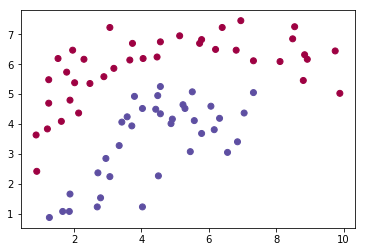

(74, 2)
(74, 1)
training sample: [6.062  4.5951] [1.]
testing sample:  [4.9176 1.7864] [1.]


In [5]:
# Creating or Loading the Data:
X, Y, X_test, Y_test =  get_training_testing_sets('../input/data1.csv')

# Viewing the data
plt.scatter(X[:, 0], X[:, 1], c = Y.reshape(Y.shape[0],).tolist(), cmap=plt.cm.Spectral);
plt.show()
print(X.shape)
print(Y.shape)

# Sanity Check:
print('training sample:', X[0], Y[0])
print('testing sample: ',X_test[0], Y_test[0])

**Fitting Logistic Regression over the data to see the decision boundary**

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


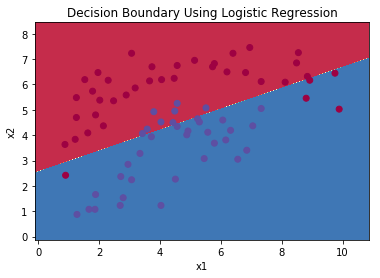

In [6]:
# Fitting Logistic Regression over the data to see the decision boundary (Just for observation):
clf = LogisticRegression()
clf.fit(X, Y)


plot_decision_boundary(lambda x: clf.predict(x), X, Y, 'Decision Boundary Using Logistic Regression')



**Creating the neural network and fitting it**

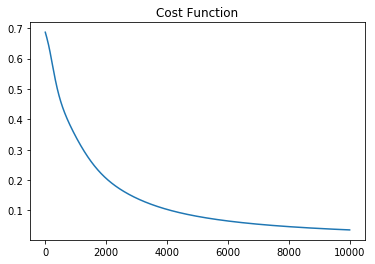

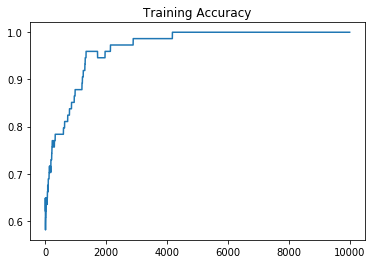

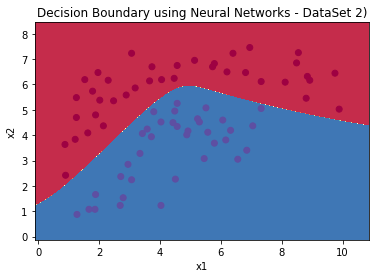

training_accuracy: 1.0
testing_accuracy:  1.0


In [7]:
    
# Defining the dimensions of the neural network and constants of gradient descent
L = 2
n = {0: 2, 1: 4, 2: 1}
activation_fn = {1: tanh, 2: sigmoid}
d_activation_fn = {1: d_tanh, 2: d_sigmoid }
alpha = 0.02
iterations = 10000

# Creating the neural network
neural_network = {'L': L, 'n': n, 'W': None, 'B': None, 'activation_fn': activation_fn, 'd_activation_fn': d_activation_fn}

# Training the network:
training_accuracy = fit(neural_network, X, Y, iterations, alpha, Verbose = True)
plot_decision_boundary(lambda x: predict(neural_network, x), X, Y, 'Decision Boundary using Neural Networks - DataSet 2)')

print('training_accuracy:', training_accuracy)

# Testing the network on Testing Data
Y_predicted = predict(neural_network, X_test)
testing_accuracy = accuracy_score(Y_predicted, Y_test)
print('testing_accuracy: ',testing_accuracy)

**Trying it out on another data set:**

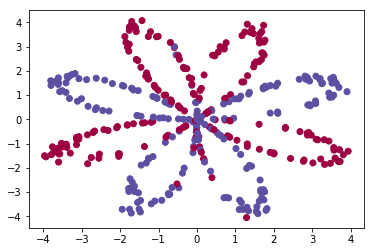

(400, 2)
(400, 1)
training sample: [-1.03786802  0.8667993 ] [1]
testing sample:  [-3.11046963 -0.98743991] [0]


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


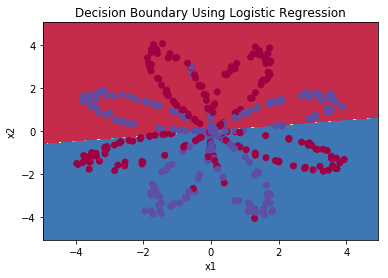

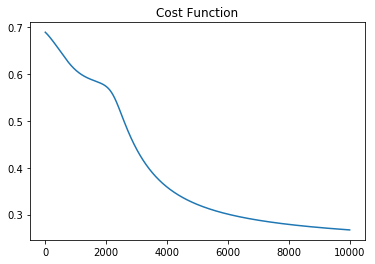

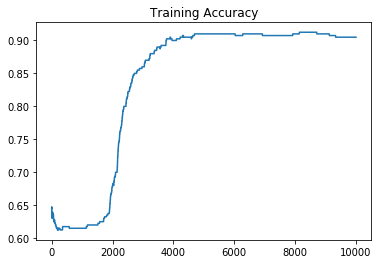

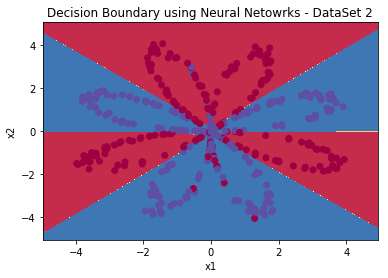

training_accuracy: 0.905
testing_accuracy:  0.92


In [8]:
# Loading the Data:

# Linearly seperable dataset:
# X, Y, X_test, Y_test =  get_training_testing_sets('../input/data0.csv')
# Non Linear data sets:
X, X_test, Y, Y_test = load_planar_dataset()
# X, Y, X_test, Y_test =  get_training_testing_sets('../input/data1.csv')

# Viewing the data
plt.scatter(X[:, 0], X[:, 1], c = Y.reshape(Y.shape[0],).tolist(), cmap=plt.cm.Spectral);
plt.show()
print(X.shape)
print(Y.shape)

# Sanity Check:
print('training sample:', X[0], Y[0])
print('testing sample: ',X_test[0], Y_test[0])

# Fitting Logistic Regression over the data to see the decision boundary (Just for observation):

from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X, Y)


plot_decision_boundary(lambda x: clf.predict(x), X, Y, 'Decision Boundary Using Logistic Regression')




# Defining the dimensions of the neural network and constants of gradient descent
L = 2
n = {0: 2, 1: 4, 2: 1}
activation_fn = {1: tanh, 2: sigmoid}
d_activation_fn = {1: d_tanh, 2: d_sigmoid }
alpha = 0.02
iterations = 10000

# Creating the neural network
neural_network = {'L': L, 'n': n, 'W': None, 'B': None, 'activation_fn': activation_fn, 'd_activation_fn': d_activation_fn}

# Training the network:
training_accuracy = fit(neural_network, X, Y, iterations, alpha, Verbose = True)
plot_decision_boundary(lambda x: predict(neural_network, x), X, Y, 'Decision Boundary using Neural Netowrks - DataSet 2')

print('training_accuracy:', training_accuracy)

# Testing the network on Testing Data
Y_predicted = predict(neural_network, X_test)
testing_accuracy = accuracy_score(Y_predicted, Y_test)
print('testing_accuracy: ',testing_accuracy)